# Sesión 2 Tipos de información en R y funciones incorporadas


# 1.0 Vectores de caracteres
Los vectores y escalares pueden construirse usando caractéres de tipo 'string' en lugar de números. Todos los elementos en un vector deben ser del mísmo tipo. Por ejemplo:

In [ ]:
colores = c('red','yellow','blue')
mas.colores = c(colores,'green','magenta','cyan') # este comando apendiza nuevos elementos a colores
z = c('red','green',1)

In [ ]:
colores
mas.colores
z

[1] "red"    "yellow" "blue"

[1] "red"     "yellow"  "blue"    "green"   "magenta" "cyan"

[1] "red"   "green" "1"

Para verificar el tipo de información que tenemos usamos una función incorporada en R conocida como *class*. 

Como el vector z tiene elementos del tipo 'character', entonces el número 1 que se encontraba ahí, pasa a tener este tipo de información.

In [ ]:
class(z)

[1] "character"

Hay dos operaciones básicas que se podrían desarrollar sobre vectores de caracteres. Para tomar subcadenas, usamos


```
substr()
```
Este toma argumentos *substr(x,start,stop)*, donde *x* es un vector de cadenas de caracteres, y *start* y *stop* nos sugieren qué caracteres guardar. Por ejemplo, para imprimir las primeras dos letras de cada color usamos


In [ ]:
substr(colores,1,2)

[1] "re" "ye" "bl"

La otra operación básica es la construcción de cadenas es vía concatenación. Usamos la función 


```
paste()
```
para esto. Por ejemplo,


In [ ]:
paste(colores,'flowers')

[1] "red flowers"    "yellow flowers" "blue flowers"

Hay dos parámetros opcionales para el comando *paste()*. El parámetro *sep* controla lo que va entre las componentes que estamos concatenando. Podríamos no querer por defecto el espacio, por ejemplo:

In [ ]:
paste('several',colores,'s', sep="/")

[1] "several/red/s"    "several/yellow/s" "several/blue/s"

El parámetro *collapse* para *paste()* permite que todos los componentes del vector resultante sean colapsados en una cadena singular:

In [ ]:
paste('I like',colores,collapse = ",")

[1] "I like red,I like yellow,I like blue"

# 1.1 Factores

Los factores ofrecen una forma alternativa de almacenar información de tipo caracter. Por ejemplo, un factor con 4 elementos y que tiene dos niveles, *control* y *treatment* puede ser creada usando 

In [ ]:
grp = c("control","treatment","control","treatment")
grp

[1] "control"   "treatment" "control"   "treatment"

In [ ]:
grp = factor(grp)
print(grp)

[1] control   treatment control   treatment
Levels: control treatment


In [ ]:
Vect = c("m","m","h","m","h")
Vect = factor(Vect)
print(Vect)

[1] m m h m h
Levels: h m


In [ ]:
levels(Vect)

[1] "h" "m"

In [ ]:
class(Vect)

[1] "factor"

In [ ]:
x = c(1,3,4)
levels(x)

NULL

In [ ]:
paste("Es",Vect)

[1] "Es m" "Es m" "Es h" "Es m" "Es h"

Los factores son una forma más eficiente de guardar información tipo caracter cuando hay repeticiones entre los elementos de un vector. Esto es porque los niveles de un factor son internamente codificados como enteros. Para ver qué códigos usa nuestro factor, podemos escribir

In [ ]:
as.integer(grp)

[1] 1 2 1 2

las etiquetas de los niveles solo se almacenan una vez cada una, en lugar de repetirse. Los códigos son índices en el vector de niveles


In [ ]:
levels(grp)
print(grp)

[1] "control"   "treatment"

[1] control   treatment control   treatment
Levels: control treatment


## Mas sobre la extracción de elementos de vectores

Al igual que vectores numéricos, los corchetes cuadrados [] son usados para ubicar el índice del factor y los elementos caracteres del vector. Por ejemplo, el factor *grp* tiene cuatro elementos, así que podemos imprimir el tercer elemento escribiendo:

In [ ]:
print(grp[3])

[1] control
Levels: control treatment


Podemos acceder desde el segundo al quinto elemento del vector *mas.colores* como sigue:

In [ ]:
mas.colores[2:5]

[1] "yellow"  "blue"    "green"   "magenta"

Cuando hayan valores NA, la función 


```
is.na()
```
debería ser usada para detectarlos. Por ejemplo,


In [ ]:
some.events = NULL
some.events[seq(2,20,2)] = seq(2,20,2)
some.events

[1] NA  2 NA  4 NA  6 NA  8 NA 10 NA 12 NA 14 NA 16 NA 18 NA 20

In [ ]:
is.na(some.events)

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE
[13]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE

In [ ]:
!is.na(some.events)

[1] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
[13] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE

Podemos iincluso mostrar los números distintos de NA:

In [ ]:
some.events[!is.na(some.events)]

[1]  2  4  6  8 10 12 14 16 18 20

# 1.2 Matrices y Arreglos

Para ordenar los valores en una matriz, usamos la función


```
matrix()
```



In [ ]:
m1 = matrix(1:6,nrow = 2, ncol=3,byrow = FALSE)
print(m1)

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6


In [ ]:
m2 = matrix(1:6,nrow = 2, ncol=3, byrow = TRUE)
print(m2)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6


In [ ]:
x = c(1/3,-4,5/2,2,5,9,-sqrt(2),-1)
m1 = matrix(x,nrow=2,ncol=4)
print(m1)

           [,1] [,2] [,3]      [,4]
[1,]  0.3333333  2.5    5 -1.414214
[2,] -4.0000000  2.0    9 -1.000000


Podemos acceder a los elementos usando dos índices. Por ejemplo, el valor en la primera fila, segunda columna es 

In [ ]:
m[1,2]

[1] 2

Algo que puede ser confuso en R, es que R también permite que una matriz sea indizada como un vector, usando solo un valor:

In [ ]:
m[5]

[1] 3

Aquí los elementos son seleccionados en el orden en el cual ellos son guardados  internamente: hacia abajo la primera columna, luego hacia abajo en la segunda, y así sucesivamente. Este orden es conocido como **orden de almacenamiento principal de la columna**.

Columnas o filas completas pueden ser seleccionadas dejando el correspondiente índice en blanco:

In [ ]:
m[1,]
m[,1]

[1] 1 2 3

[1] 1 4

Una forma más general de guardar información es en **arreglos**. Los arreglos tienen múltiples índices, y son creados usando la función array:

In [ ]:
a = array(1:24,c(3,4,2))
print(a)

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12

, , 2

     [,1] [,2] [,3] [,4]
[1,]   13   16   19   22
[2,]   14   17   20   23
[3,]   15   18   21   24



Nótese que las dimensiones se especificaron en el vector *c(3,4,2)*.

In [ ]:
m3 = matrix(1:9,nrow=3,ncol=3)
print(m3)

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9


In [ ]:
print(m1+m2)

     [,1] [,2] [,3]
[1,]    2    5    8
[2,]    6    9   12


In [ ]:
print(m1+m3)

ERROR: ignored

In [ ]:
#print(3*m1)
print(m1*m1)  # no es la multiplicación típica de matrices del álgebra lineal

     [,1] [,2] [,3]
[1,]    1    9   25
[2,]    4   16   36


In [ ]:
print(m1)

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6


In [ ]:
print(m1^(-1)) # 1/m1 no es la inversa, m1 con componentes los inversos multiplicativos del mismo m1

ERROR: ignored

In [ ]:
print(m1)
print(m2)

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6


In [ ]:
print(m1/m2)

     [,1] [,2]     [,3]
[1,]  1.0  1.5 1.666667
[2,]  0.5  0.8 1.000000


## 1.2.1 Multiplicación Matricial, Inversión y Transposición

Si $A_{m\times n}$ y $B_{n\times p}$ son matrices, entonces el **producto matricial** $AB$ es la matriz $C$ cuyo término $ij$ ésimo es dado por
$$c_{ij}=\sum_{k=1}^na_{ik}b_{kj}\hspace{1cm}i=1,...,m;\hspace{0.3cm}j=1,...,p.$$
En R, esta forma de multiplicación matricial puede ser desarrollada usando el operador 

```
%*%
```
Por ejemplo:


In [ ]:
A = matrix(c(1,-1,2,4,4,3),nrow=2)
B = matrix(c(2,1,-5),nrow=3)
print(A)
print(B)
print(A%*%B)

     [,1] [,2] [,3]
[1,]    1    2    4
[2,]   -1    4    3
     [,1]
[1,]    2
[2,]    1
[3,]   -5
     [,1]
[1,]  -16
[2,]  -13


In [ ]:
print(B%*%A)

ERROR: ignored

In [ ]:
A*B

ERROR: ignored

La **inversa** de una matriz cuadrada $A_{n\times n}$, denotada por $A^{-1}$ es la solución a la ecuación matricial $AA^{-1}=I_{n\times n}$, donde $I_{n\times n}$ es la matriz identidad.

En R, las matrices son invertidas y los sistemas de ecuaciones lineales se resuelven usando la función 

```
solve()
```
Esta función se puede usar para encontrar la inversa de $A$ como
```
A^(-1) = solve(A)
```
y también soluciones sistemas lineales $A\textbf{x}=\textbf{b}$

```
x = A^(-1)b = solve(A,b)
```





Ejemplo



In [ ]:
D = matrix(c(-1,4,3,2),nrow=2)
D_inv = solve(D) 
print(D)
print(D_inv)

     [,1] [,2]
[1,]   -1    3
[2,]    4    2
           [,1]       [,2]
[1,] -0.1428571 0.21428571
[2,]  0.2857143 0.07142857


In [ ]:
print(round(D%*%D_inv))

     [,1] [,2]
[1,]    1    0
[2,]    0    1


In [ ]:
round(3.2475,2)

[1] 3.25

En R, se transpone una matriz usando la función 


```
t()
```
Ejemplo


In [ ]:
print(A)
print(t(A))

     [,1] [,2] [,3]
[1,]    1    2    4
[2,]   -1    4    3
     [,1] [,2]
[1,]    1   -1
[2,]    2    4
[3,]    4    3


### Elementos en la diagonal de una matriz 

In [ ]:
print(diag(D)) # diag() extrae un vector con los elementos de la diagonal principal de la matriz de argumento

[1] -1  2


In [ ]:
print(diag(A))

[1] 1 4


### Determinante de una matriz

In [ ]:
det(D)

[1] -14

In [ ]:
dim(A)

[1] 2 3

In [ ]:
print(diag(3))

     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1


## Ejercicio
Resuelva el sistema lineal

\begin{eqnarray*}
x+2y+6z &=&-1\\
2x+3y-7z &=&2\\
x-y+3z &=& 5
\end{eqnarray*}
Imprima la solución como

"La solución es dada por x= " "y=" "z=" redondeada  dos cifras decimales.

### Solución

In [ ]:
mat = matrix(c(1,2,1,2,3,-1,6,-7,3),nrow=3,ncol=3) # creo la matriz A del sistema
solucion = solve(mat,c(-1,2,5))   # resolvemos el sistema Ax=b
print(solucion)

[1]  3.4444444 -1.8888889 -0.1111111


In [ ]:
paste("la solución es dada por x=",round(solucion[1],2),"y=",round(solucion[2],2),"z=",round(solucion[3],2))

[1] "la solución es dada por x= 3.44 y= -1.89 z= -0.11"

# 1.3 Data frames

La mayoría de bases de datos se encuentra almacenada en R como data frames. Estos son como matrices, pero las columnas tienen sus nombres propios. Las columnas pueden ser de diferentes tipos entre ellas. Usamos la función


```
data.frame()
```
para construir data frames desde vectores:



In [ ]:
colores = c("red","yellow","blue")
numeros = c(1,2,3)
colores.y.numeros = data.frame(colores,numeros,mas.numeros=c(4,5,6))
print(colores.y.numeros)

  colores numeros mas.numeros
1     red       1           4
2  yellow       2           5
3    blue       3           6


## Data frames y la función *read.table*
Las bases de datos consisten frecuentemente de uno o más columnas de información, donde cada columna representa mediciones de una variable. En cada fila usualmente se representa un observación.

Por ejemplo, la siguiente información consiste de 4 observaciones sobre tres variables $x$, $y$ y $z$.



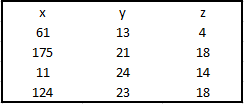

In [ ]:
tab.df = read.table("pretend.dat",header=T)
tab.df

Warning message in read.table("pretend.dat", header = T):
“incomplete final line found by readTableHeader on 'pretend.dat'”


x,y,z
<int>,<int>,<int>
61,13,4
175,21,18
11,24,14
124,23,18


In [ ]:
class(tab.df)

[1] "data.frame"

In [ ]:
tab.df[,1]# la variable x es seleccionada

[1]  61 175  11 124

In [ ]:
x = tab.df[,"x"]
summary(x) # obtenemos un resumen estadístico 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   48.50   92.50   92.75  136.75  175.00 

In [ ]:
summary(x)[3]

Median 
  92.5 

# 2.0 Funciones incorporadas en R (Built-in Functions)

Una útil alternativa para usar *help()* es la función *example()*:

Este ejemplo muestra un uso simple de la función 
```
mean()
```
y también del uso del argumento *trim*. (Cuando *trim=0.1* el más alto 10% y el más bajo 10% de la información son borrados antes de calcular el promedio aritmético.)

Para el vector x=(0,1,2,3,4,5,6,7,8,9,10,50), cuando especificamos el parámetro *trim*=0.10, estamos indicando que a la información se le quitará el 10% de los datos al inicio y al final, este valor corresponde a 1.2, el cual, R aproxima al entero más cercano mayor, 2 en este caso. Por lo que al aplicar la función *mean()* con dicho argumento, le sacamos la media al vector (2,3,4,5,6,7,8,9) 



In [ ]:
example(mean)


mean> x <- c(0:10, 50)

mean> xm <- mean(x)

mean> c(xm, mean(x, trim = 0.10))
[1] 8.75 5.50


# 2.1 Cómo encontrar ayuda cuando no se sabe el nombre de la función.


Un comando que puede ser de utilidad es
```
help.search()
```
Por ejemplo, si se quiere averiguar por la existencia de alguna función o rutina de optimización, escribimos




In [ ]:
help.search('optimization')

Podemos entonces revisar  una función en específico tal como 
```
help(nlm)
```



# 2.2 Funciones Built-in para graficar

Dos gráficas básicas son el histograma y un diagrama de dispersión de puntos. 
Consideremos por ejemplo

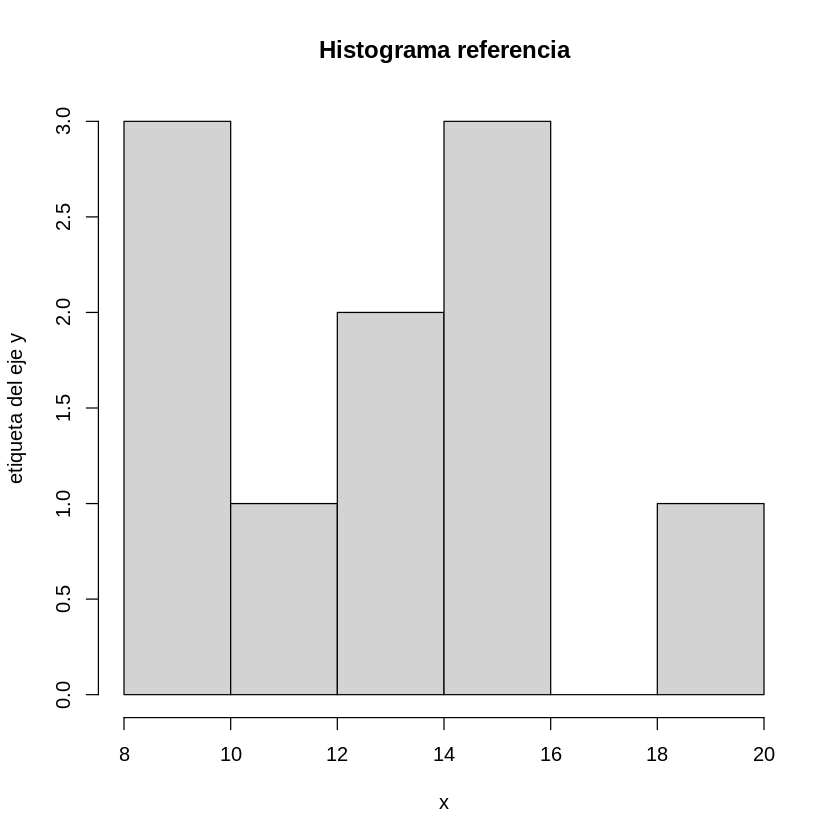

In [ ]:
x = c(12,15,13,20,14,16,10,10,8,15)
hist(x,main="Histograma referencia",ylab="etiqueta del eje y")

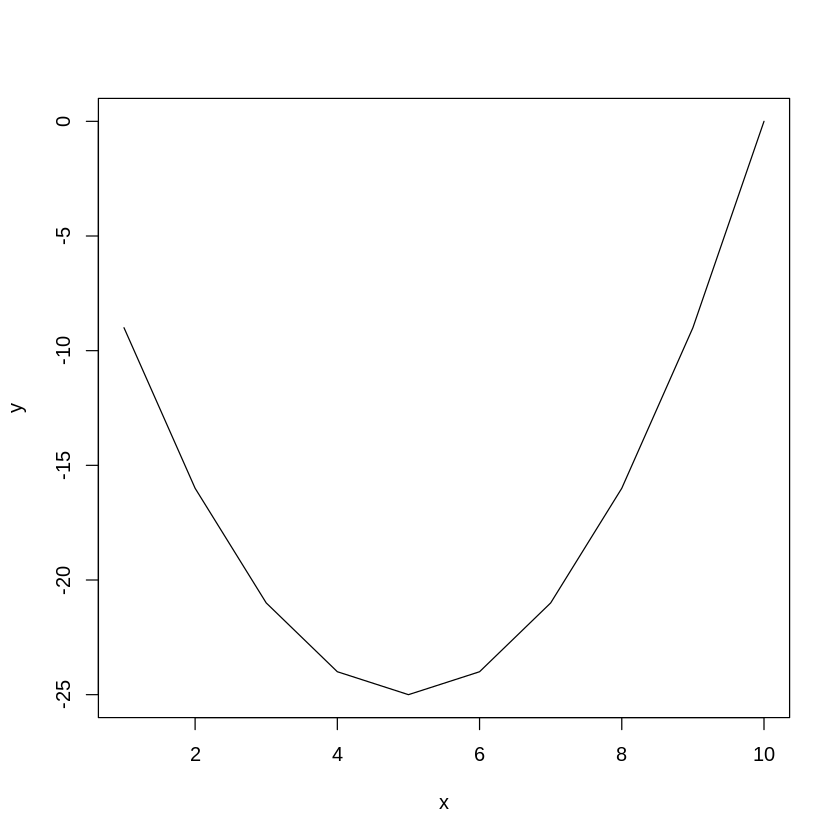

In [ ]:
x = seq(1,10)
y = x^2 - 10*x
plot(x,y,type="l")

Note que los valores $x$ son graficados a lo largo del eje horizontal.

Otra función útil de dibujo de gráficas es la función *curve()* para obtener el gráfico de una función matemática univariada sobre un intervalo. Los puntos a la izquierda y a la derecha del intervalo son especificados por los argumentos *from* y *to* respectivamente.

El parámetro *expr* es una función (cuyo resultado es un vector numérico cuando la entrada es un vector numérico) o una expresión en términos de $x$.

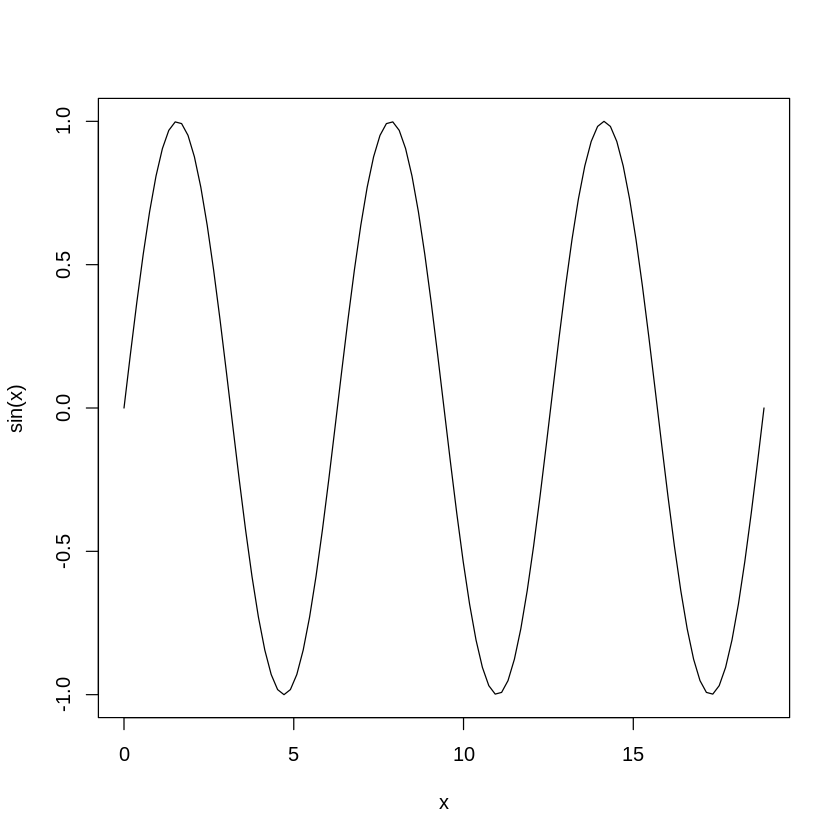

In [ ]:
curve(expr=sin,from=0,to=6*pi)

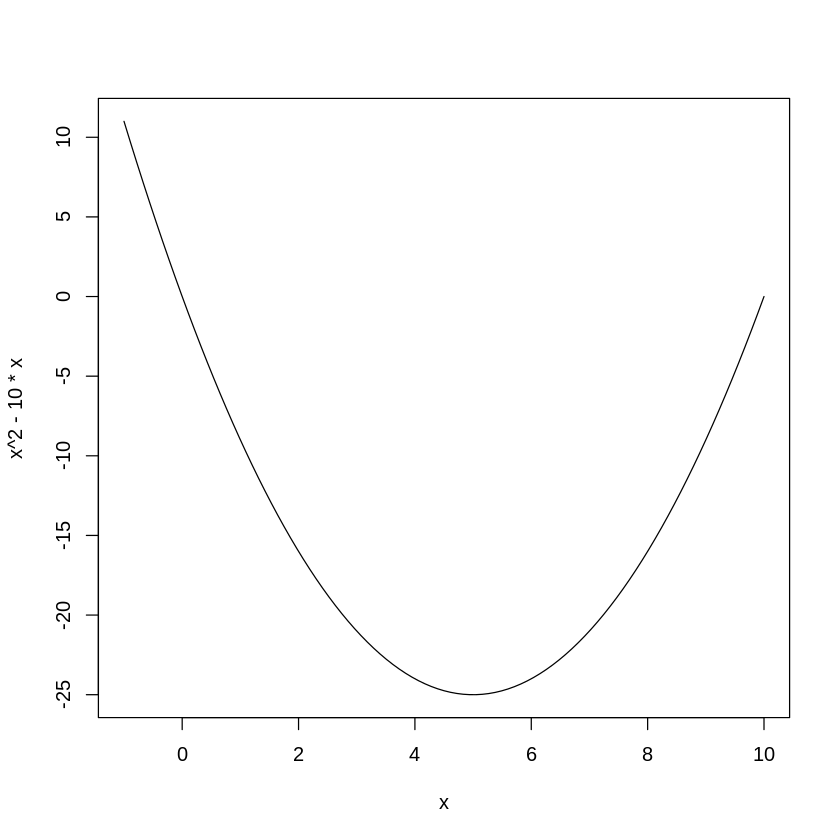

In [ ]:
curve(x^2-10*x,from=-1,to=10)

# 2.3 Funciones Built-in elementales adicionales
## La mediana muestral

La media muestral mide el valor medio de una base de datos numérica. Si los datos son 
$$x[1]\leq x[2]\leq \cdots\leq x[n],$$
 entonces la mediana es $x[(n+1)/2]$, si $n$ es impar, o $\left\{\frac{x[n/2]+x[n/2+1]}{2}\right\}$, si $n$ es par. Por ejemplo:

In [ ]:
a = c(10,10,18,30,32)
median(a)

[1] 18

In [ ]:
b = c(40,10,10,18,30,32)
median(b)

[1] 24

## Otras medidas de resúmen de datos 
Los resúmenes estadísticos pueden ser calculados para información guardada en vectores. En particular

In [ ]:
var(a) # Este comando calcula la varianza del vector a

[1] 112

In [ ]:
summary(b) # Este comando hace un resúmen estadístico del vector b.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   12.00   24.00   23.33   31.50   40.00 

# 3.0 Ejercicios

1.   Las siguientes son unas muestras de observaciones sobre la radiación solar entrante en un invernadero:
               11.1 10.6 6.3 8.8 10.7 11.2 8.9 12.2


* Asigne la información a un objeto llamado *radiacion.solar*
* Encuentre la media, mediana y varianza de las observaciones de radiación.
* Sume 10 a cada observación de *radiacion.solar*, y asigne el resultado a la variable *sr10*. Qué estadísticas cambian, y cuánto?
* Multiplique cada observación por -2, y asigne el resultado a la variable *srm2*. Cómo cambian las estadísticas?
* Grafique un histograma de *radiacion.solar*, *sr10* y *srm2*.
* Hay dos fórmulas comunmente usadas para la varianza de un conjuto de números:
$$\frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})^2$$
y
$$\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2$$
Uno usa la muestra de tamaño $n$ en el denominador, y el otro usa $n-1$.

¿Cuál fórmula usa la fóruma *var()* en R?




In [ ]:
radiacion.solar <- c(11.1,10.6 ,6.3 ,8.8 ,10.7, 11.2, 8.9 ,12.2)
print(mean(radiacion.solar))
print(median(radiacion.solar))
print(var(radiacion.solar))

[1] 9.975
[1] 10.65
[1] 3.525


In [ ]:
sr10 = radiacion.solar + 10
print(mean(sr10))
print(median(sr10))
print(var(sr10))

[1] 19.975
[1] 20.65
[1] 3.525


In [ ]:
sr2 = radiacion.solar*(-2)
print(mean(sr2))
print(median(sr2))
print(var(sr2))

[1] -19.95
[1] -21.3
[1] 14.1


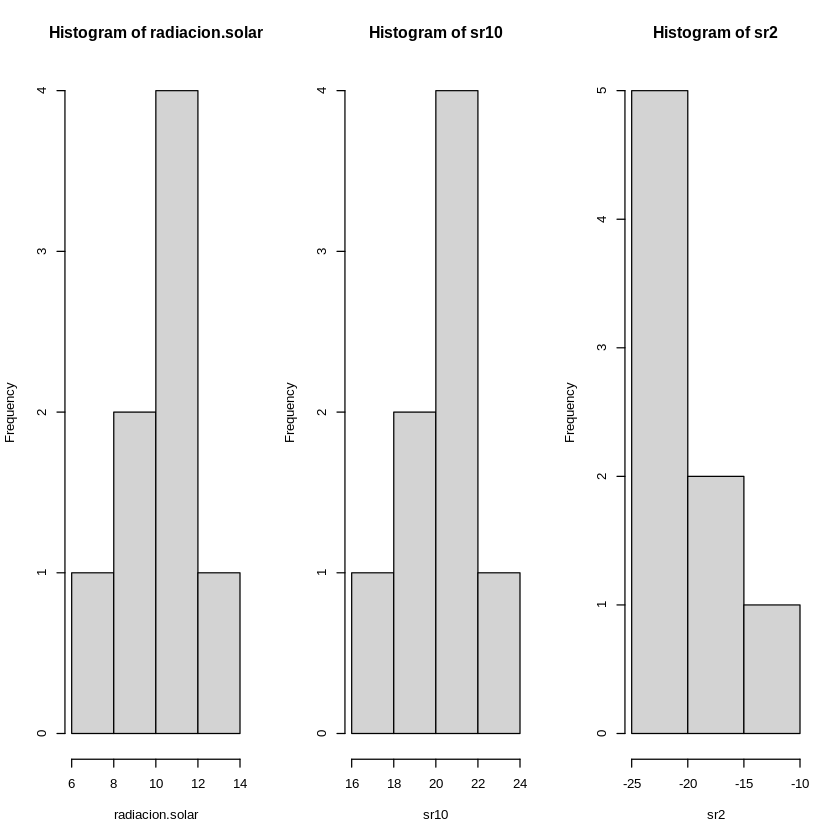

In [ ]:
par(mfrow = c(1,3))  # Graficar en una matriz de una fila por tres columnas
hist(radiacion.solar)
hist(sr10)
hist(sr2)
par(mfrow = c(1,1))

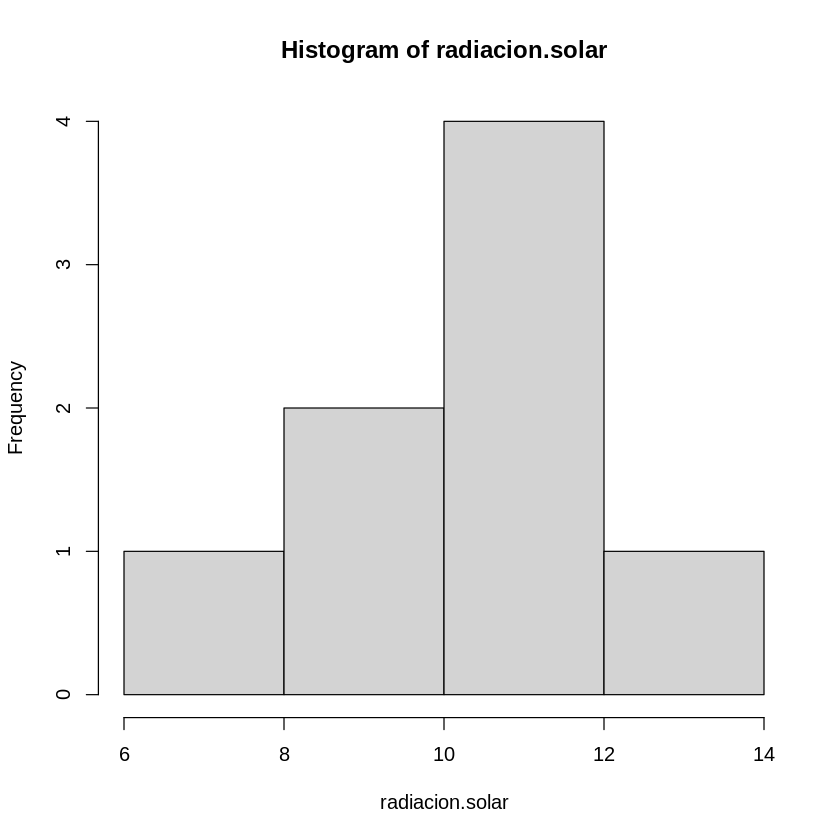

In [ ]:
hist(radiacion.solar)

In [ ]:
var(radiacion.solar) == sum((radiacion.solar-mean(radiacion.solar))^2)/length(radiacion.solar)  

[1] FALSE

In [ ]:
abs(sum((radiacion.solar-mean(radiacion.solar))^2)/length(radiacion.solar)-var(radiacion.solar))

[1] 0.440625

In [ ]:
var(radiacion.solar)==sum((radiacion.solar-mean(radiacion.solar))^2)/(length(radiacion.solar)-1)  

[1] TRUE

In [ ]:
3==6/2

[1] TRUE

# 4.0 Vectores Lógicos y operadores relacionales

Hemos usdo la función *c()* para juntar vectores numéricos como también de caracteres. R también soporta vectores lógicos. Contienen dos valores: 


```
TRUE o FALSE
```



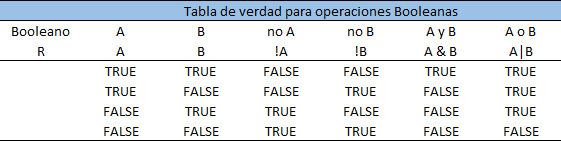

# 4.1 Operaciones lógicas en R

Uno de los tipos básicos de vector en R es el de valores lógicos. Por ejemplo, un vector lógico puede ser construido como

In [ ]:
a = c(TRUE,FALSE,FALSE,TRUE)

El resultados es un vector de 4 valores lógicos. Los valores lógicos pueden ser usadas como índices:

In [ ]:
b = c(13,7,8,2)
b[a]

[1] 13  2

Los elementos de *b* correspondientes a *TRUE* son seleccionados.

Si intentamos desarrollar aritmética sobre un vector lógico, por ejemplo 

In [ ]:
sum(a)

[1] 2

In [ ]:
1 == TRUE

[1] TRUE

Entonces entendemos que R tiene un valor numérico de 1 correspondiente al valor lógico *TRUE*, mientras que valora a *FALSE* con un 0.

Hay dos versiones de los operadores Booleanos. Las versiones usuales son 


```
&, | y !
```
Ellas son vectorizadas, así que vemos por ejemplo


In [ ]:
!a

[1] FALSE  TRUE  TRUE FALSE

Si intentamos operaciones lógicas sobre un vector numérico, el número 0 se toma como *FALSE*, y cualquier valor no nulo es tomado como *TRUE*:

In [ ]:
a & (b-2)

[1]  TRUE FALSE FALSE FALSE

In [ ]:
print(b-2)
print(a)

[1] 11  5  6  0
[1]  TRUE FALSE FALSE  TRUE


In [ ]:
a | (b-2)

[1] TRUE TRUE TRUE TRUE

## La disyunción exclusiva (ó exclusivo) está dada por el comando

```
xor(x,y)
```



In [ ]:
print(a)
print(b)

[1]  TRUE FALSE FALSE  TRUE
[1] 13  7  8  2


# 4.2 Ejercicios
1. Usando los valores de *a* y *b*, prediga el resultado de cada una de las expresiones, luego intentelas calcular en R:
* min(b)
* min(a)
* max(b)
* max(a)
* length(a)
2. Escriba b*a

In [ ]:
print(min(b))
print(min(a))
print(max(b))
print(max(a))
length(a)
b*a

[1] 2
[1] 0
[1] 13
[1] 1


[1] 4

[1] 13  0  0  2

In [ ]:
min(a)

[1] 0

# 4.3 Operadores relacionales
Frecuentemente es necesario probar relaciones a la hora de programar para decidir si ellas son *TRUE* o *FALSE*. R permite hacer pruebas sobre relaciones de igualdad y desigualdad usando los operadores relacionales 

<,>,==,>=,<=,!=

Ejemplos

In [ ]:
a = c(3,6,9)

Para probar que los elementos son mayores o iguales a 4, escribimos

In [ ]:
a>4

[1] FALSE  TRUE  TRUE

Para  probar que los elementos son exactamente iguales a 4, escribimos

In [ ]:
a==4

[1] FALSE FALSE FALSE

Para probar que elementos son mayores o iguales a 4, escribimos

In [ ]:
a>=4

[1] FALSE  TRUE  TRUE

Para escribir los elementos de *a* que son mayores o iguales a 4, escribimos

In [ ]:
a[a>4]

[1] 6 9

In [ ]:
b = c(4,6,8)

Para probar qué elementos de *a* son menores que los elementos correspondientes a *b*, escribimos

In [ ]:
a<b

[1]  TRUE FALSE FALSE

Para imprimir los elementos de *a* que son menores que los correspondientes elementos de *b*, escribimos

In [ ]:
a[a<b]

[1] 3